# Spam Classification with SVM

*Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. We will use SVMs to build our own spam filter.*

---
## PRE-PROCESSING THE DATA

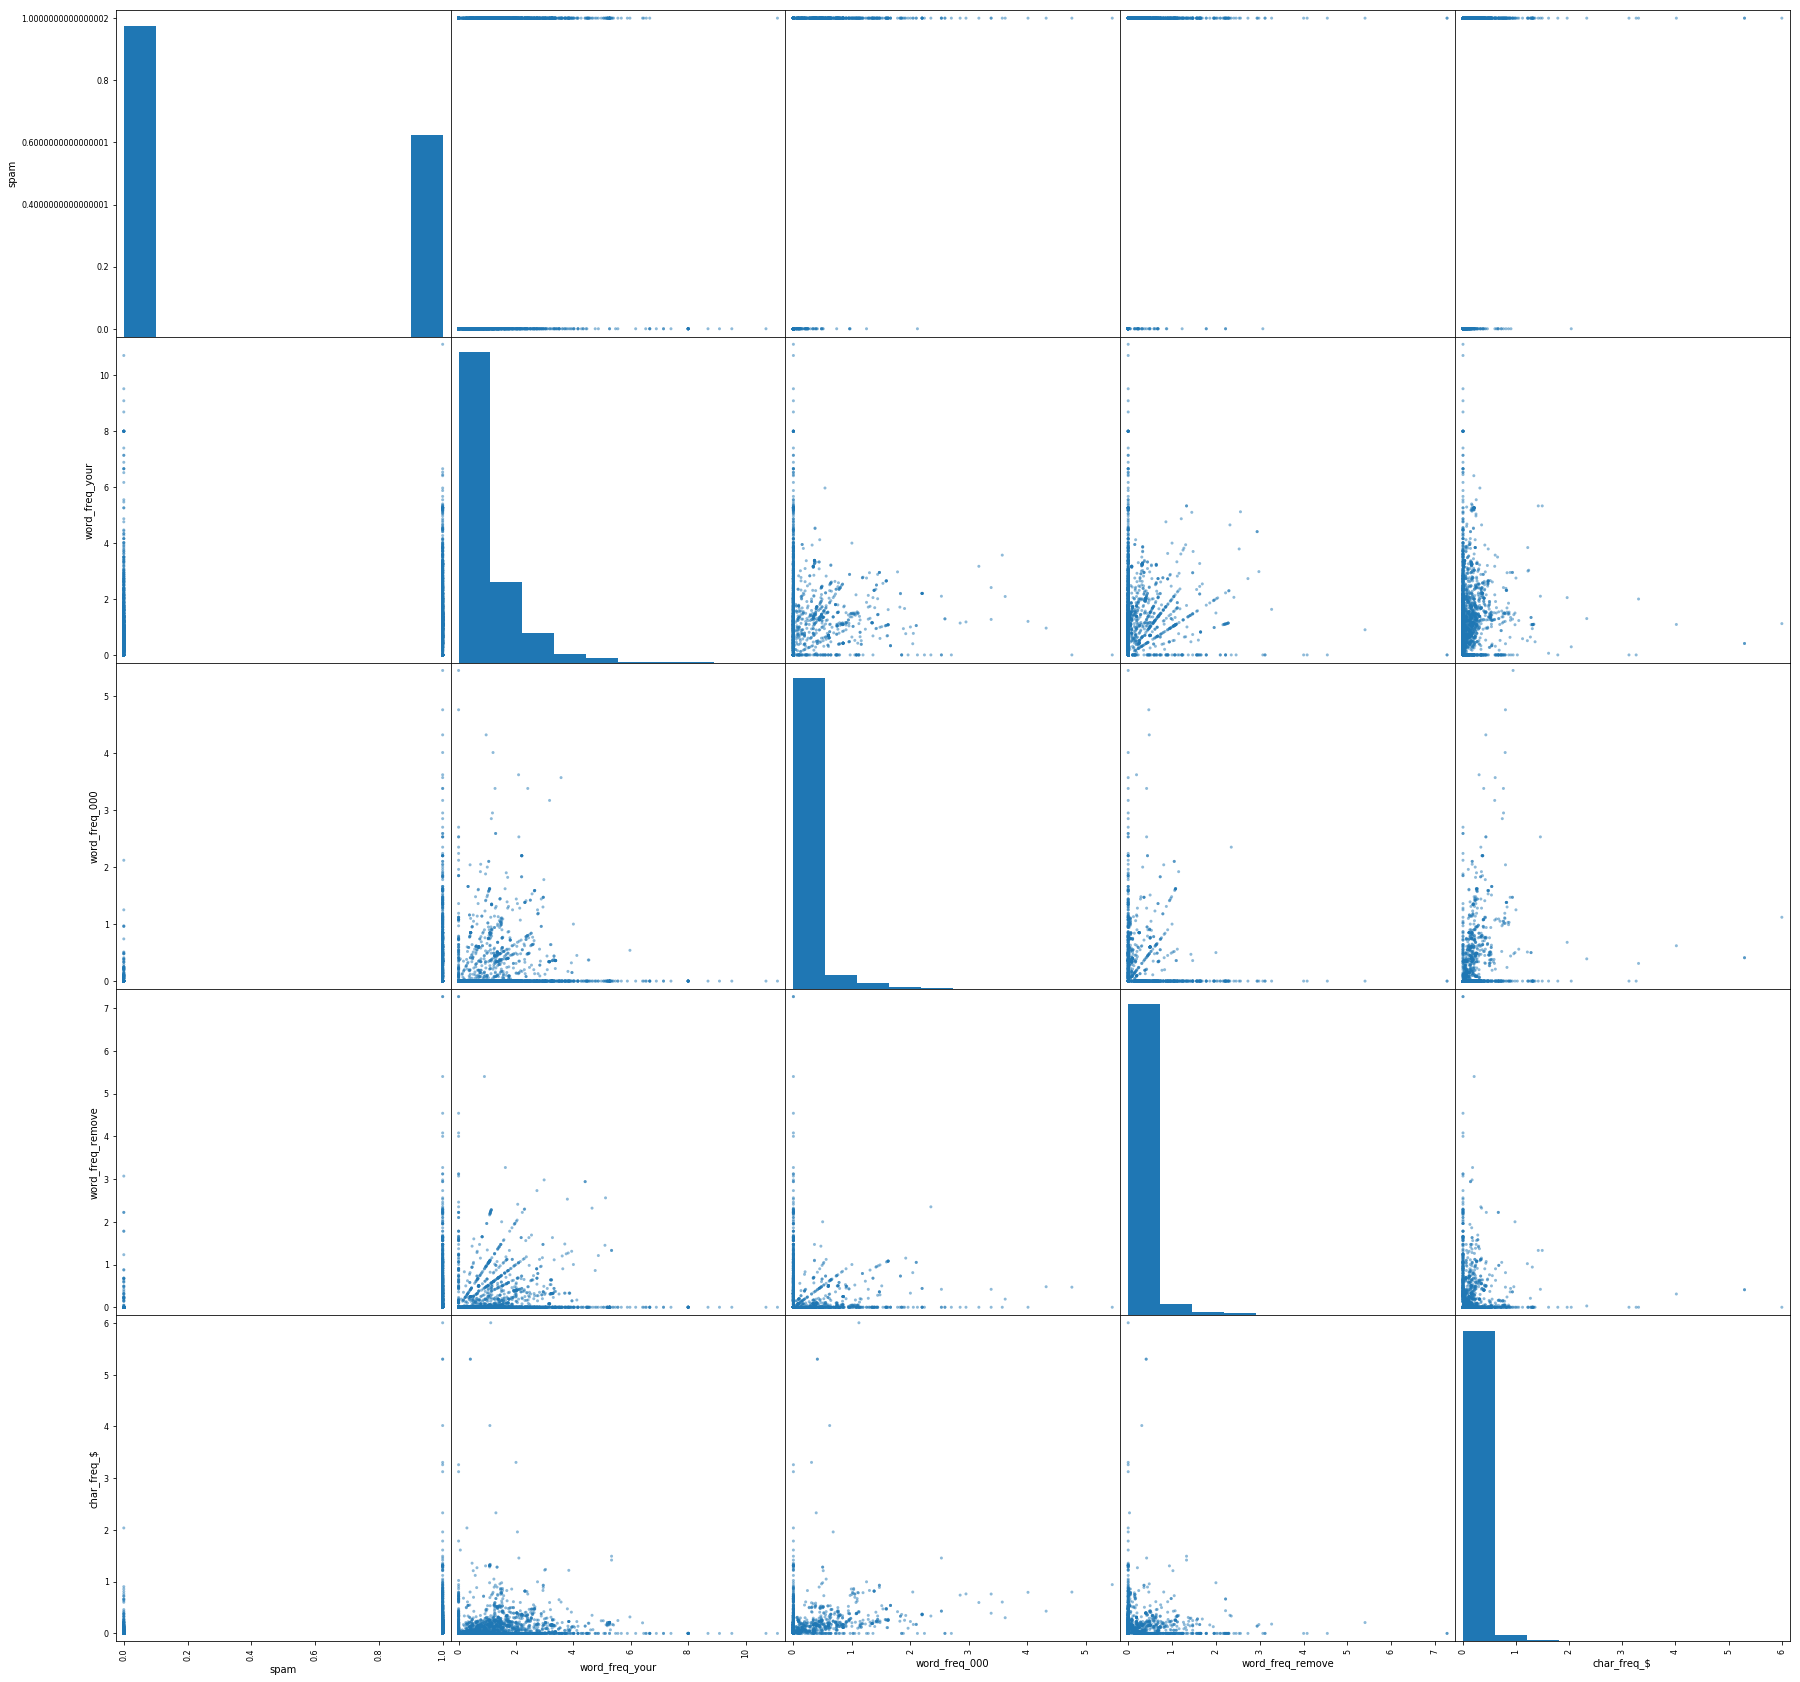

In [228]:

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

def load_data():
    csv_path = os.path.join("spambase.csv")
    return pd.read_csv(csv_path)


data = load_data()
# print(len(data))

train_set, test_set = train_test_split(data, test_size=0.20, random_state = 42)

X_train = train_set.drop('spam', axis=1);
y_train = train_set['spam'].copy();
X_test = test_set.drop('spam', axis=1);
y_test = test_set['spam'].copy();
# print(len(x_train))
# print(len(x_test))

corr_matrix = data.corr()
print(corr_matrix["spam"].sort_values(ascending=False))

from pandas.plotting import scatter_matrix

attributes = ["spam", "word_freq_your", "word_freq_000", "word_freq_remove", "char_freq_$"]
scatter_matrix(data[attributes], figsize=(30,30))

x_train = StandardScaler().fit(X_train).transform(X_train)
x_test = StandardScaler().fit(X_test).transform(X_test)

- - -
## TRAINING LINEAR SVM FOR SPAM CLASSIFICATION

Accuracy: 0.9142236699239956
Precision: 0.9405099150141643
Recall: 0.8512820512820513
F-Score: 0.8936742934051144


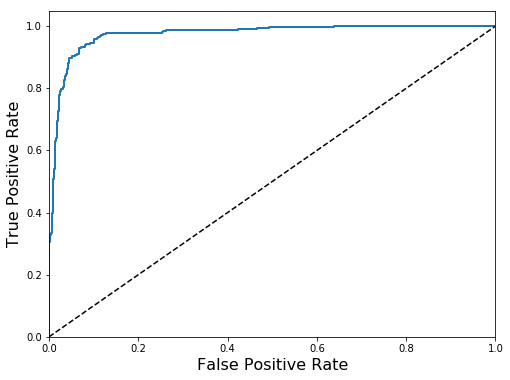

0.9740595876189095

In [213]:
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

# Training your svm here
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf.fit(x_train, y_train)
y_pred = svm_clf.predict(x_test)

# Testing your svm here
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy: " + str(accuracy))
precision = precision_score(y_test, y_pred)
print("Precision: " + str(precision))
recall= recall_score(y_test, y_pred)
print("Recall: " + str(recall))
fscore= f1_score(y_test, y_pred)
print("F-Score: " + str(fscore))

# ROC Curve 
y_scores = svm_clf.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()


- - -
## TUNING REGULARIZATION HYPER-PARAMETER C

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

precision = []
accuracy = []
f1 = []
recall = []
ind = []
scores = []
# c_vals = [.001, .01, .02, .05, .1, 1, 10, 15, 50, 100] initially, realized I should focus on values around 10 
c_vals = [9.5, 10, 10.1, 10.2, 10.3, 10.5, 11, 12]
for i in c_vals:
    svm_clf = LinearSVC(C=i, loss="hinge", random_state=42)
    s = cross_val_score(svm_clf,x_train, y_train, scoring = 'precision', cv=20)
    a = cross_val_score(svm_clf,x_train, y_train, scoring = 'accuracy', cv=20)
    f = cross_val_score(svm_clf,x_train, y_train, scoring = 'f1_macro', cv=20)
    r = cross_val_score(svm_clf, x_train, y_train, scoring = 'recall', cv=20)
    cscore = cross_val_score(svm_clf, x_train, y_train, cv=20)
    s = s.mean()
    a = a.mean()
    f = f.mean()
    r = r.mean()
    cscore = cscore.mean()
    precision.append(s)
    accuracy.append(a)
    f1.append(f)
    recall.append(r)
    scores.append(cscore)
    # print(str(i) + ": " + " Precision: " + str(s) + ", Accuracy: " + str(a) + ", F1: " + str(f) + ", Recall: " + str(r))
    ind.append(i)


In [199]:
# Graph for Precision

plt.plot(ind,precision)
plt.xlabel("Value of C", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.show()

In [200]:
# Graph for Accuracy

plt.plot(ind,accuracy)
plt.xlabel("Value of C", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [201]:
# Graph for F1 Score

plt.plot(ind,f1)
plt.xlabel("Value of C", fontsize=14)
plt.ylabel("F1 Score", fontsize=14)
plt.show()

In [202]:
# Graph for recall

plt.plot(ind,recall)
plt.xlabel("Value of C", fontsize=14)
plt.ylabel("Recall", fontsize=14)
plt.show()

In [203]:
# Graph for cross validation score 

plt.plot(ind,scores)
plt.xlabel("Value of C", fontsize=14)
plt.ylabel("C Val Score", fontsize=14)
plt.show()

---
## CONCLUSION: 
Through the cross-validation process, I believe using a hyperparameter of the value 10 would optimize the tradeoff
between margin and data violation in our SVM model. After calculating precision, accuracy, f1-scores, and recall 
for each value of C I found that the value of 10.1 yielded the highest percentages across the board for each performance measure. I initially started with c-values that were lower, and after plotting each performance measure against my values of C, I realized that I had a peak around the value of 10. Therefore, it made sense for me to focus my attention on values around 10, so I changed my initial C value array with values closer to the prospective peak. The hyperparameter with a value of 9.5 yielded a lower accuracy than the value of 10, but 10.1 yielded slightly higher precision, accuracy, F1-score, C-score, and recall than 10. The value of 10.3 yielded a slightly higher precision but at a lower recall, so I chose to take that trade-off and keep the value of 10.1 as my optimal hyperparameter value. 

- - -
## SELECTING THE FEATURES WITH LINEAR SVM

              feature     weight  abs_weight
26   word_freq_george  13.240027   13.240027
40       word_freq_cs   4.609050    4.609050
24       word_freq_hp   2.337203    2.337203
43  word_freq_project   1.324493    1.324493
3        word_freq_3d   1.215626    1.215626


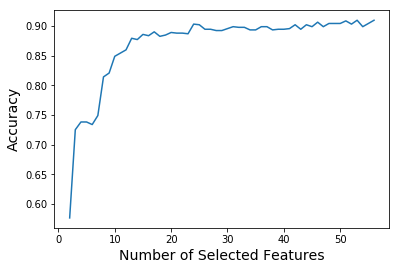

In [173]:
svm_clf.fit(x_train, y_train)
weights = svm_clf.coef_
weights = weights[0]
weights = np.absolute(weights)
accuracy = []
n_features = []
# X_train = X_train.values
# X_test = X_test.values
for n in range(2, 57):
    topn = np.argpartition(weights, -n)[-n:]
    new_x_train = x_train[:, topn]
    new_x_test = x_test[:, topn]
    new_x_test.size
    svm_clf = LinearSVC(C=10.1, loss="hinge", random_state=42)
    svm_clf.fit(new_x_train, y_train)
    y_pred2 = svm_clf.predict(new_x_test)
    acc= accuracy_score(y_test, y_pred2)
    n_features.append(n)
    accuracy.append(acc)
features = pd.DataFrame({'feature':data.columns[:-1], 'weight': weights})
features['abs_weight'] = features['weight'].abs()
features_sorted = features.sort_values('abs_weight', ascending=False)
feat_list = list(features_sorted['feature']) 
print(features_sorted[:5])
    
plt.plot(n_features,accuracy)
plt.xlabel("Number of Selected Features", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.show()


---
## CONCLUSION:
The top five features I found for the linear SVM were word_freq_george(26), word_freq_cs(40), word_freq_hp(24), word_freq_project(43), word_freq_3d(3). Looking at the graph, it can be seen that as each top feature is added, the accuracy of the linear SVM increases. There is an initial jump, which looks to be when feature number 3 (word_freq_3d) was added. As more and more features are added, the trend increases but there is obviously a tiny peak around halfway between 20 and 30 features, which would be explained by the additions of feature number 24 and feature number 26. The increase from there on out is gradual but never highly increasing, except when we hit around feature number 40. The additions of feature number 40 and feature number 43 yield a slightly higher slope of the accuracy line. This is a really cool and interesting thing to see because the line clearly reflects an increase in accuracy as each of the top five features is added. I thought the top SPAM features would be similar to those listed in the correlation matrix, but the actual weights of the features for the SVM classifier do not relate to the correlation matrix above. The SVM weights for a specific feature also depends on the other features, especially if the features are correlated so perhaps there were other factors in play that influenced the top n weights. 

- - -
## KERNELIZING SVM WITH THE GAUSSIAN RBF

Linear AUC: 0.9740595876189095
RBF AUC: 0.9824134434303925
-------------------------------------------------
Linear Accuracy: 0.9142236699239956
Linear Precision: 0.9405099150141643
Linear Recall: 0.8512820512820513
Linear F-Score: 0.8936742934051144
-------------------------------------------------
RBF Accuracy: 0.9446254071661238
RBF Precision: 0.9721448467966574
RBF Recall: 0.8948717948717949
RBF F-Score: 0.9319092122830441


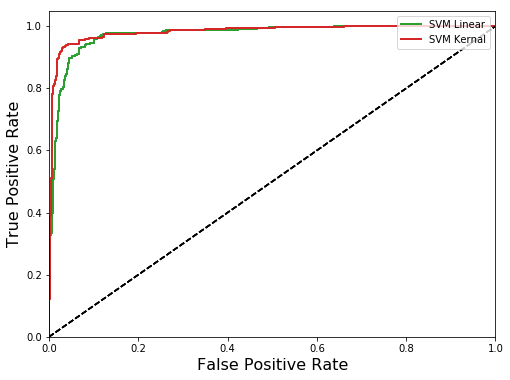

In [229]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

svm_clfs = []
hyperparams = []
scores= []

"""
First array choices: For gamma, 0.0001 to 0.1 & for C, 0.000001 to 2000 
Second array choices: For gamma, 0.001 to 0.1 & for C, 0.000001 to 1050 
Third array choices: For gamma = [0.001, 0.002, 0.005, 0.01] & C = [100, 500, 1000, 5000, 10000]
Fourth array choices: For gamma = [0.001, 0.005, 0.01] & C = [100, 1000, 5000, 10000]
"""

gs = [0.001, 0.005, 0.01]
cs = [100, 1000, 5000, 10000]
for gamma in gs:
    for C in cs: 
        hyperparams.append((gamma, C))
for g, c in hyperparams:
    rbf_kernel = SVC(kernel="rbf", gamma=g, C=c)
    rbf_kernel.fit(x_train, y_train)
    sc = cross_val_score(rbf_kernel,x_train, y_train, cv=20)
    sc = sc.mean()
    print(str(g) + ", " + str(c) + ": " + str(sc))

"""
After running and narrowing down the above loop and checking the cross-validation scores, I found that 
a value of 0.001 for gamma and a value of 1000 for C yields the highest cross-validation score. This is
the combination I will be using to test the polynomial kernel SVM against the linear SVM. 
""" 
    
rbf_kernel_svm_clf = SVC(kernel="rbf", C=1000, gamma=0.001)
rbf_kernel_svm_clf.fit(x_train, y_train)   
y_scores1 = rbf_kernel_svm_clf.decision_function(x_test)
fpr2, tpr2, thresholds = roc_curve(y_test, y_scores1)
def plot_roc_curve(fpr2, tpr2, label=None):
    plt.plot(fpr2, tpr2, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plot_roc_curve(fpr2,tpr2)
plot_roc_curve(fpr, tpr, label="SVM Linear")
plot_roc_curve(fpr2,tpr2, label = "SVM Kernal")
plt.legend(loc = 'upper right')
plt.plot()

print("Linear AUC: " + str(roc_auc_score(y_test, y_scores)))
print("RBF AUC: " + str(roc_auc_score(y_test, y_scores1)))
print("-------------------------------------------------")
y_pred2 = rbf_kernel_svm_clf.predict(x_test)
accuracy1= accuracy_score(y_test, y_pred)
print("Linear Accuracy: " + str(accuracy1))
precision1 = precision_score(y_test, y_pred)
print("Linear Precision: " + str(precision1))
recall1= recall_score(y_test, y_pred)
print("Linear Recall: " + str(recall1))
fscore1= f1_score(y_test, y_pred)
print("Linear F-Score: " + str(fscore1))
print("-------------------------------------------------")
accuracy2= accuracy_score(y_test, y_pred2)
print("RBF Accuracy: " + str(accuracy2))
precision2 = precision_score(y_test, y_pred2)
print("RBF Precision: " + str(precision2))
recall2= recall_score(y_test, y_pred2)
print("RBF Recall: " + str(recall2))
fscore2= f1_score(y_test, y_pred2)
print("RBF F-Score: " + str(fscore2))

---
## CONCLUSION

After testing various combinations of values of C and gamma, I found that the value of 1000 for C and the value of 0.001 for gamma created the optimal RBF Kernel SVM. This combination yielded a cross-validation score of 0.9377, which was the highest cross-validation score throughout all of testing. After training the rbf_kernel model using those two values, the ROC curve for the SVM Kernel was plotted on the same graph as the ROC curve for the Linear Kernel. The AUC score for the Linear Kernel had the value of 0.974 and the AUC score for the RBF Kernel had a value of 0.982. The precision, accuracy, recall, and F1-score were also all higher for the RBF Kernel compared to the Linear Kernel. Thus, the RBF Kernel yields a higher performance than the Linear Kernel. The RBF Kernel really provides a good model as it promises high performance measures for an SVM classifier, so it would be great to be deployed in practice. The only problem with determining the optimal combination of C and gamma is that the entire process takes a very long time, so it would not be adequate to deploy in actual practice but there are definitely quicker ways to get the optimal values of C and gamma such as GridSearch or RandomizedSearch. 